In [53]:
import random
import matplotlib.pyplot as plt
from nltk.book import * #24 and following
from nltk import edit_distance


*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


### 31. For given S use k-means algorithm for clustering. Return pictures of clusters for k = 2, 3, 4, 5.

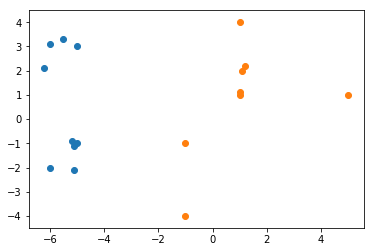

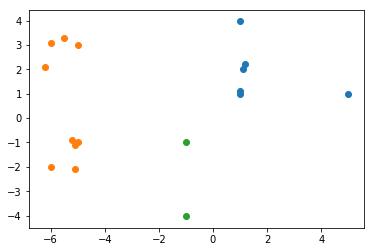

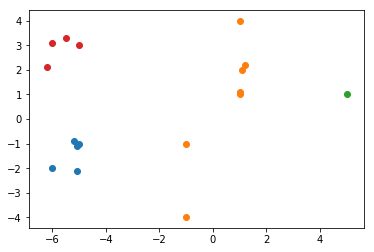

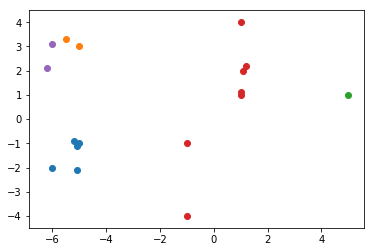

In [50]:
N = [2, 3, 4, 5]
colours = ['r', 'g', 'b', 'k', 'c']
points = [(1,1), (1,4), (1.1, 2), (1, 1.1)
        , (1.2, 2.2), (5,1), (-1, -1), (-1, -4)
        , (-5.1, -2.1), (-5.2, -0.9), (-5.1, -1.1), (-5, -1)
        , (-6, -2), (-6.2, 2.1), (-5, 3), (-6, 3.1)
        , (-5.5, 3.3)]
def dist(a, b):
    return ((a[0]-b[0])**2+((a[1]-b[1])**2)**0.5, a)
def recenter(l):
    if l == []:
        return (random.uniform(-10, 10), random.uniform(-10, 10))
    else:
        a = [0, 0]
        for i in l:
            a[0] += i[0]
            a[1] += i[1]
        return (a[0]/len(l), a[1]/len(l))
x = [point[0] for point in points]
y = [point[1] for point in points]

for i in N:
    plt.figure(i)
    centers = [(random.uniform(-10, 10), random.uniform(-10, 10)) for _ in range(i)]
    clusters = {center:[] for center in centers} 
    for point in points:
        tmp = [dist(center, point) for center in clusters.keys()]
        tmp.sort(key=lambda x: x[0])
        clusters[tmp[0][1]].append(point)
        
    for i in range(100):
        newClusters = {}
        for cluster in clusters.values():
            newClusters[recenter(cluster)] = []
        clusters = newClusters
        for point in points:
            tmp = [dist(center, point) for center in clusters.keys()]
            tmp.sort(key=lambda x: x[0])
            clusters[tmp[0][1]].append(point)
                
    for cluster in clusters.keys():
        x = [point[0] for point in clusters[cluster]]
        y = [point[1] for point in clusters[cluster]]
        plt.scatter(x, y)

### 32. (use NLTK). Let Sl, S2, S3 be the sets of all words with at most 7 letters from textl, text 2, text 3, respectively. Let S = Sl U S2 IJ S3. Use any reasonable algorithm for clustering S (with edit distance). Return sizes of clusters for k = 2, 3, 10 clusters. 


In [56]:
S1 = set(filter(lambda x: len(x)< 7, set(text1)))
S2 = set(filter(lambda x: len(x)< 7, set(text2)))
S3 = set(filter(lambda x: len(x)< 7, set(text3)))
S = S1 | S2 | S3
clusters = [[i] for i in S]
while len(clusters) > 10:
    a = ''
    b = ''
    d = 8
    for i in clusters:
        for j in clusters:
            if i == j:
                pass
            else:
                for ii in i:
                    for jj in j:
                        if edit_distance(ii,jj) < d:
                            a = i
                            b = j
                            d = edit_distance(ii,jj)
    clusters.remove(b)
    clusters

12682